In [63]:
import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing, svm, cross_validation #scale, regresions, cross shuffle stats sepeareate data
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import style

In [64]:
style.use('ggplot')

In [65]:
df= pd.read_csv('/Users/anyaozmen/Downloads/ISCTR.csv',parse_dates = True, index_col=0)
#df

In [66]:
#print(df.index)

In [67]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-19,4.90,4.94,4.77,4.81,4.050885,22968229.0
2013-12-20,4.84,4.90,4.83,4.84,4.076151,17893713.0
2013-12-23,4.85,4.85,4.75,4.81,4.050885,13261872.0
2013-12-24,4.85,4.87,4.82,4.84,4.076151,11728087.0
2013-12-25,4.78,4.78,4.68,4.68,3.941402,19328614.0
2013-12-26,4.63,4.68,4.47,4.54,3.823497,15116925.0
2013-12-27,4.38,4.51,4.33,4.51,3.798232,15541862.0
2013-12-30,4.61,4.74,4.60,4.74,3.991933,21708882.0
2013-12-31,4.68,4.72,4.63,4.65,3.916137,17778247.0


In [68]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100

In [69]:
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100

In [70]:
df = df[['Adj Close','High_Low_per','Per_change','Volume']]

In [71]:
#df

In [72]:
label_col = 'Adj Close'

In [74]:
forecast_ceil = int(math.ceil(0.001*len(df)))
#math.ceil rounds to the top

In [75]:
df['label'] = df[label_col].shift(-forecast_ceil)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
#df.dropna(inplace=True)
#print(df.head())

In [77]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [78]:
#X_lately

In [79]:
df.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
#X = X[:-forecast_out+1]#all the points 
y = np.array(df['label'])

In [81]:
len(X)

1300

In [82]:
len(y)

1300

In [83]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [84]:
clf = svm.SVR(kernel='rbf') #svm.SVR() 

In [85]:
#clf = LinearRegression(n_jobs =-1) to run as many jobs as possible for fast

In [86]:
clf.fit(X_train, y_train) #train

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg

In [88]:
print(accuracy) #directionally accurate

0.9787215822931722


In [89]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [90]:
print(forecast_set, accuracy, forecast_out) # stockprices next 30 days

[4.06280152 4.10833667] 0.9787215822931722 2


In [62]:
df['Forecast'] = np.nan

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
#last_date = df.iloc[-1].name #find out the last date
#last_unix = last_date.timestamp()
#one_day = 86400
#next_unix = last_unix +one_day

In [31]:
#for i in forecast_set: #to have the dates
   ## next_date = datetime.datetime.fromtimestamp(next_unix)
   # next_unix += one_day
   # df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]
    #that next date is the index of the dataframe

In [32]:
#print(df.head) #a list of values that are not numbers 
#with no info in the future plus the i which means the forecast

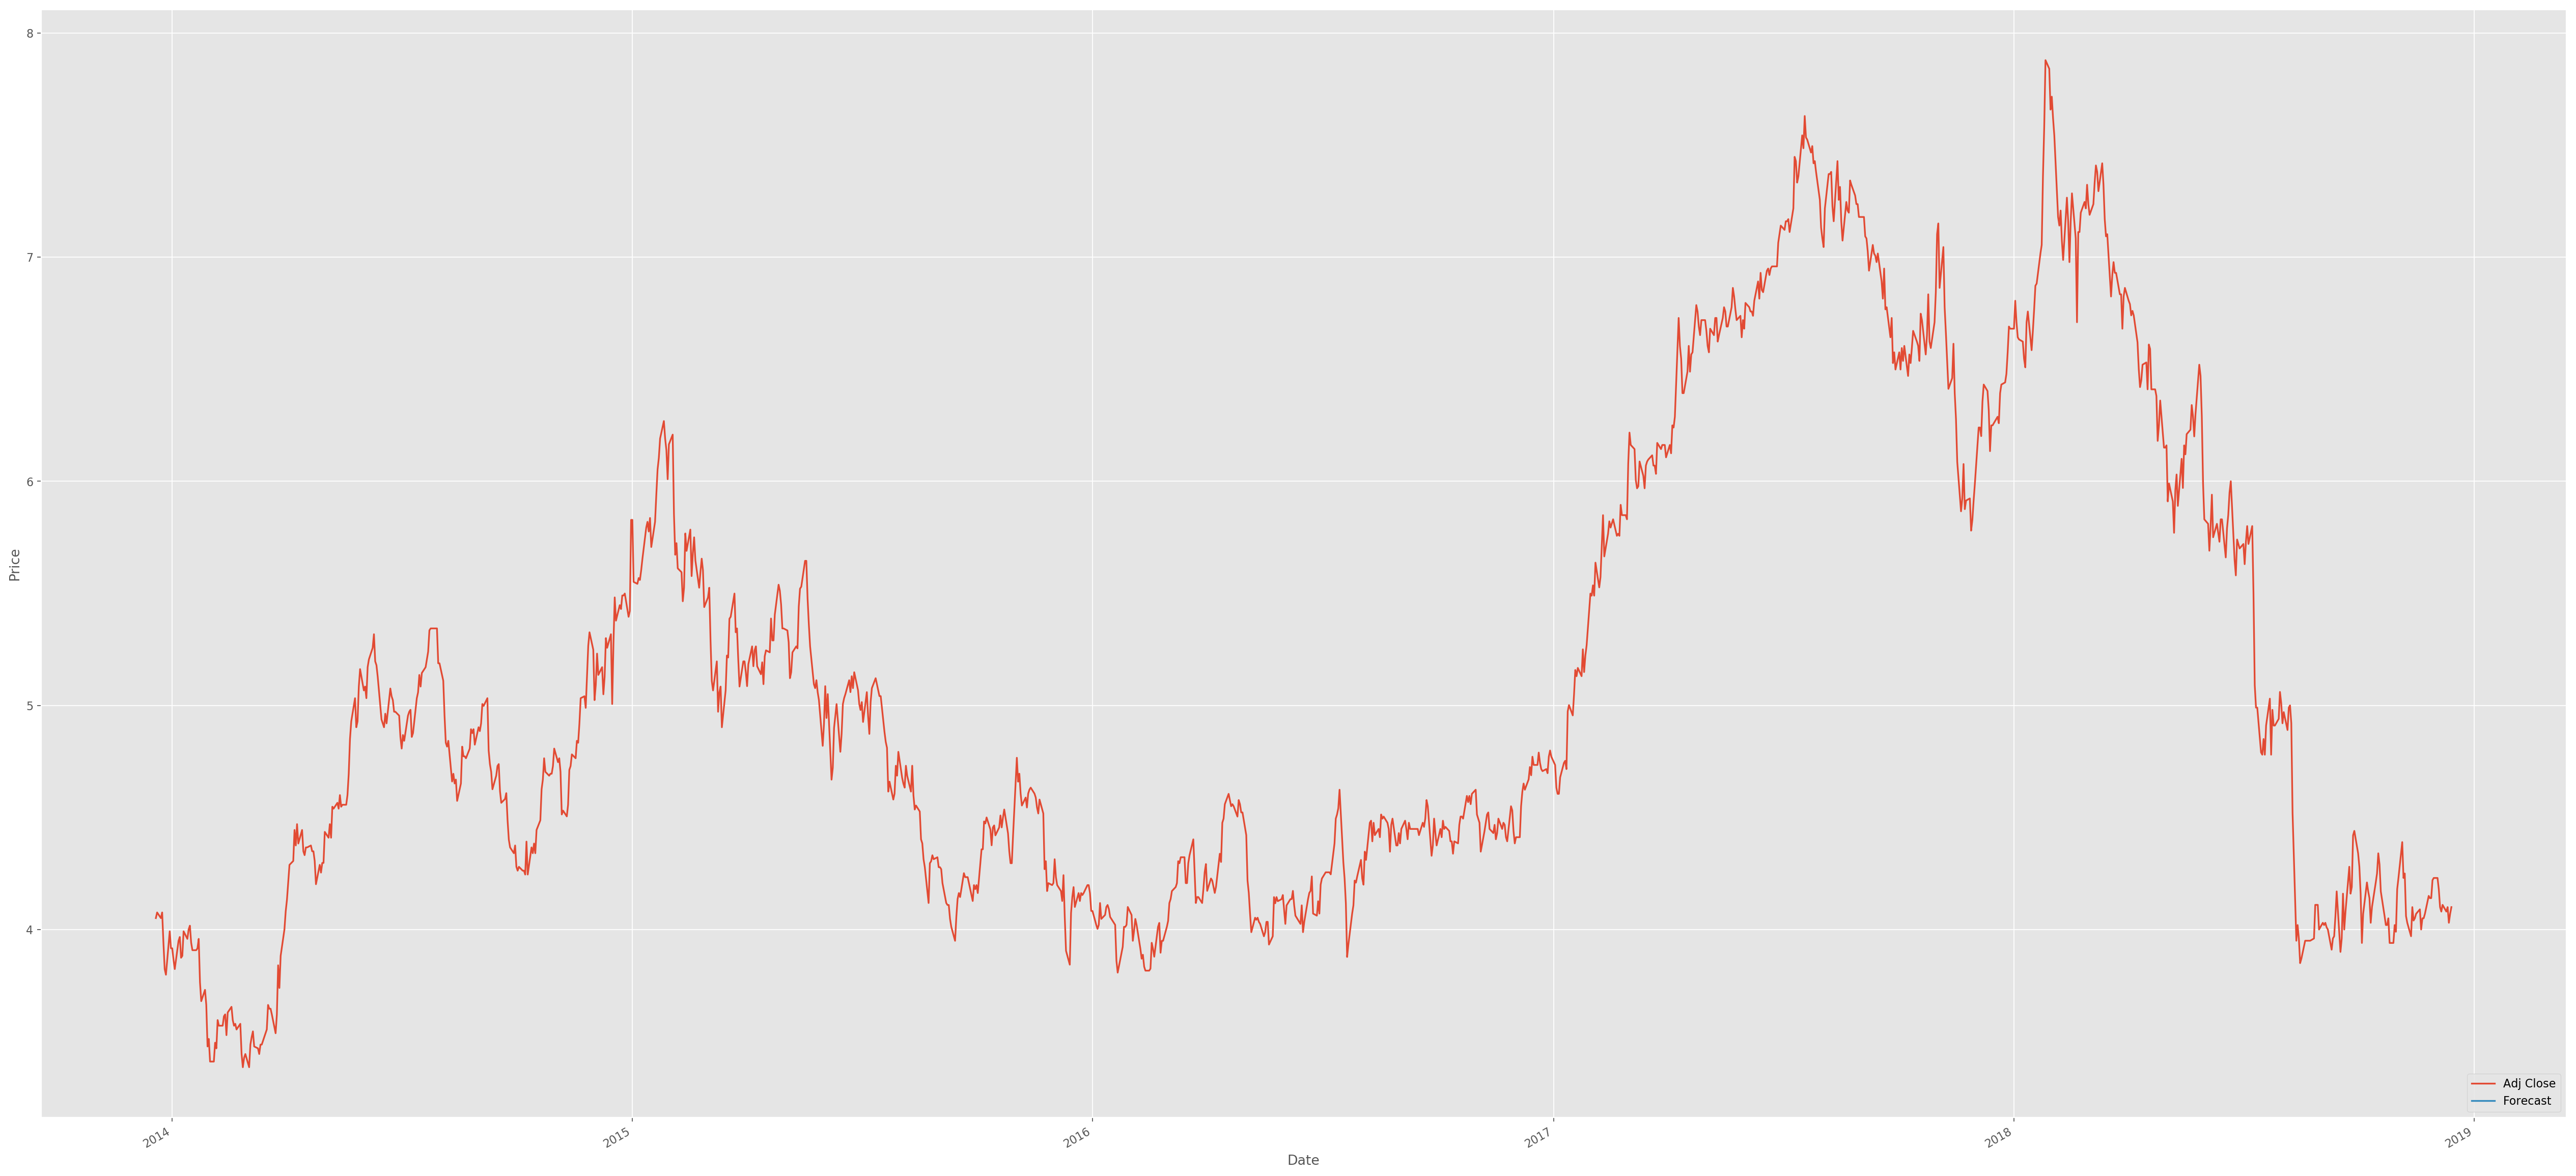

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()